<a href="https://colab.research.google.com/github/urvashi2004/ML_MiniProjects/blob/main/Unsupervised/IC01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


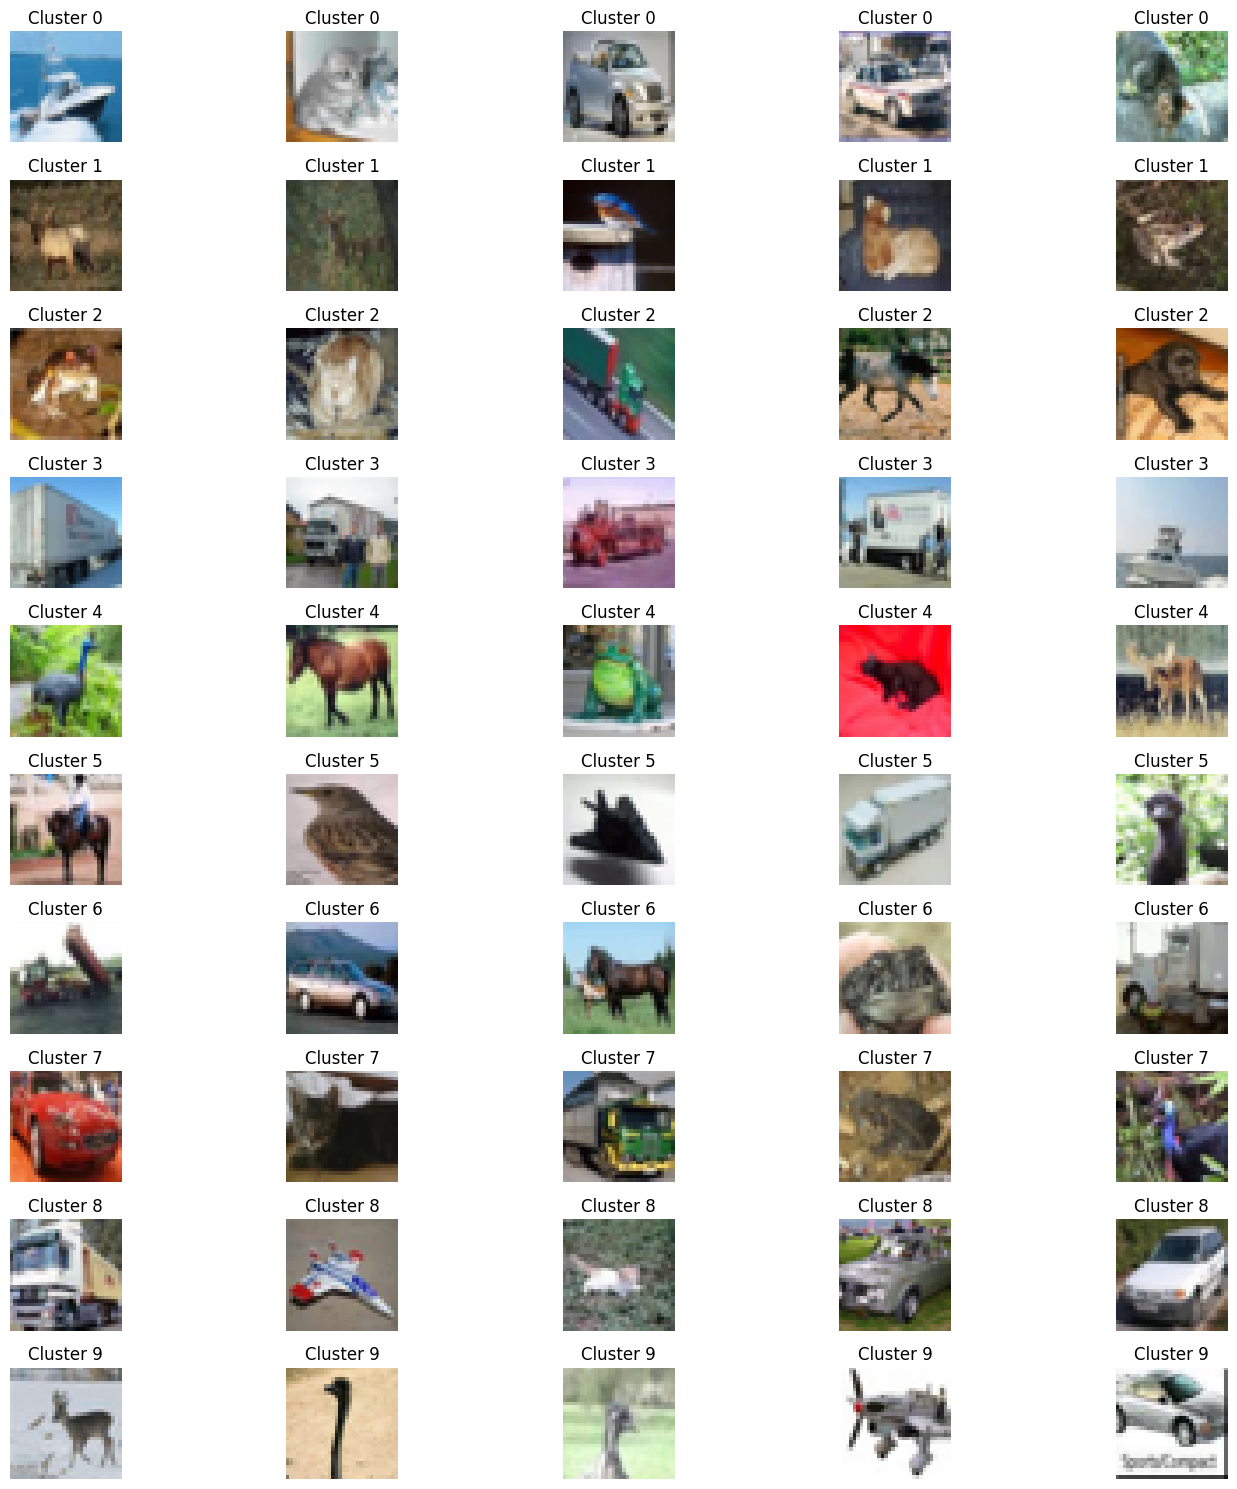

Silhouette Score: 0.06733549362740744
Adjusted Rand Index: 0.043282470865421654


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-16-a3c410ecd55f>:62: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', num_clusters)


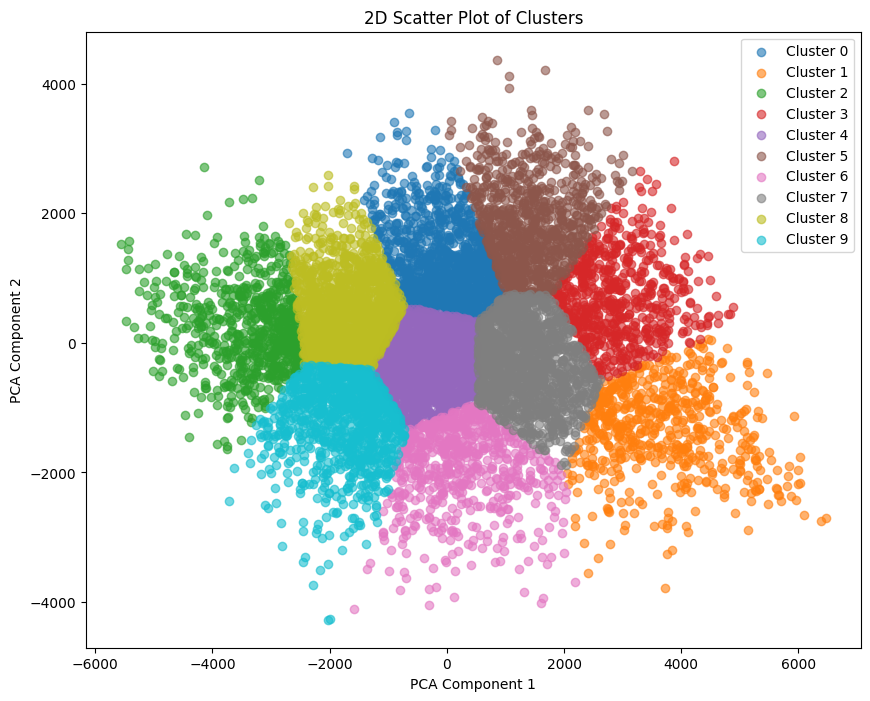

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, adjusted_rand_score
from tensorflow.keras.datasets import cifar10

# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Select a subset of the data for faster computation (optional)
subset_size = 10000
x_train_subset = x_train[:subset_size]

# Flatten the images
x_train_flat = x_train_subset.reshape(x_train_subset.shape[0], -1)

# Reduce dimensionality for faster computation and better visualization
pca = PCA(n_components=50)
x_train_pca = pca.fit_transform(x_train_flat)

# Apply K-means clustering
num_clusters = 10
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(x_train_pca)

# Visualize some of the clusters
def plot_cluster_images(images, clusters, num_clusters=10, num_images_per_cluster=5):
    plt.figure(figsize=(15, 15))
    for cluster in range(num_clusters):
        cluster_indices = np.where(clusters == cluster)[0][:num_images_per_cluster]
        for i, idx in enumerate(cluster_indices):
            plt.subplot(num_clusters, num_images_per_cluster, cluster * num_images_per_cluster + i + 1)
            plt.imshow(images[idx])
            plt.title(f'Cluster {cluster}')
            plt.axis('off')
    plt.tight_layout()
    plt.show()

# Plot the cluster images
plot_cluster_images(x_train_subset, clusters, num_clusters=num_clusters, num_images_per_cluster=5)

# Calculate Silhouette Score
silhouette_avg = silhouette_score(x_train_pca, clusters)
print(f'Silhouette Score: {silhouette_avg}')

# Calculate Adjusted Rand Index
ari = adjusted_rand_score(y_train[:subset_size].flatten(), clusters)
print(f'Adjusted Rand Index: {ari}')

# Further reduce dimensionality to 2 components for visualization
pca_2d = PCA(n_components=2)
x_train_pca_2d = pca_2d.fit_transform(x_train_flat)

# Apply K-means clustering again to match the 2D data
kmeans_2d = KMeans(n_clusters=num_clusters, random_state=42)
clusters_2d = kmeans_2d.fit_predict(x_train_pca_2d)

# Scatter plot of the clusters in 2D
def plot_scatter_clusters(x_pca_2d, clusters, num_clusters):
    plt.figure(figsize=(10, 8))
    colors = plt.cm.get_cmap('tab10', num_clusters)
    for cluster in range(num_clusters):
        cluster_indices = np.where(clusters == cluster)[0]
        plt.scatter(x_pca_2d[cluster_indices, 0], x_pca_2d[cluster_indices, 1],
                    color=colors(cluster), label=f'Cluster {cluster}', alpha=0.6)
    plt.title('2D Scatter Plot of Clusters')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.legend()
    plt.show()

# Plot the scatter clusters
plot_scatter_clusters(x_train_pca_2d, clusters_2d, num_clusters)

In [25]:
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import adjusted_rand_score, silhouette_score
from tensorflow.keras.datasets import cifar10

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Select a subset of the data for faster computation (optional)
subset_size = 10000
x_train_subset = x_train[:subset_size]

# Flatten the images
x_train_flat = x_train_subset.reshape(x_train_subset.shape[0], -1)

# Reduce dimensionality for faster computation and better visualization
pca = PCA(n_components=50)
x_train_pca = pca.fit_transform(x_train_flat)

# Apply DBSCAN clustering with adjusted parameters
eps = 5.0  # Adjust this value to change the cluster density
min_samples = 10  # Adjust this value to control how strict DBSCAN is in identifying core points
dbscan = DBSCAN(eps=eps, min_samples=min_samples)

# Fit DBSCAN to the reduced data
clusters = dbscan.fit_predict(x_train_pca)

# Check number of unique clusters
unique_clusters = np.unique(clusters)
num_clusters = len(unique_clusters)

# Ensure there are at least two different clusters to calculate ARI
if num_clusters <= 1:
    print(f'Error: DBSCAN produced {num_clusters} cluster(s). Adjust parameters and try again.')
else:
    # Calculate Adjusted Rand Index
    ari = adjusted_rand_score(y_train[:subset_size].flatten(), clusters)
    print(f'Adjusted Rand Index: {ari}')

    # Calculate Silhouette Score
    silhouette_avg = silhouette_score(x_train_pca, clusters)
    print(f'Silhouette Score: {silhouette_avg}')

    # Plot the cluster images
    def plot_cluster_images(images, clusters, num_clusters=10, num_images_per_cluster=5):
        plt.figure(figsize=(15, 15))
        for cluster in range(num_clusters):
            cluster_indices = np.where(clusters == cluster)[0][:num_images_per_cluster]
            for i, idx in enumerate(cluster_indices):
                plt.subplot(num_clusters, num_images_per_cluster, cluster * num_images_per_cluster + i + 1)
                plt.imshow(images[idx].reshape(32, 32, 3))  # Reshape for CIFAR-10 images
                plt.title(f'Cluster {cluster}')
                plt.axis('off')
        plt.tight_layout()
        plt.show()

    # Plot the cluster images
    plot_cluster_images(x_train_subset, clusters, num_clusters=num_clusters, num_images_per_cluster=5)

Error: DBSCAN produced 1 cluster(s). Adjust parameters and try again.


Saving apple_01.jpg to apple_01 (2).jpg


Saving banana_03.jpeg to banana_03 (1).jpeg


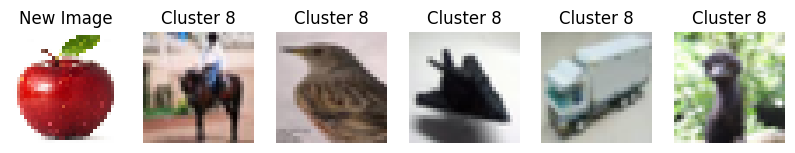

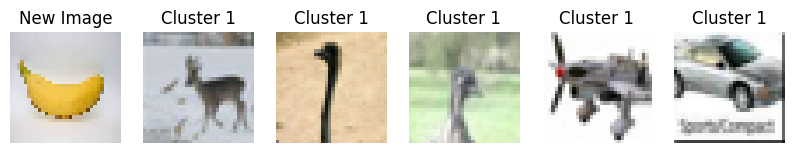

In [14]:
from sklearn.neighbors import KNeighborsClassifier
import cv2
from google.colab import files
import numpy as np
import matplotlib.pyplot as plt

# Upload and get image paths
uploaded = files.upload()
image_path01 = list(uploaded.keys())[0]
uploaded = files.upload()
image_path02 = list(uploaded.keys())[0]

# Train a KNN classifier on the clustered data
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train_pca, clusters)

# Function to classify a new image
def classify_image(image_path, knn, pca, x_train_subset, clusters, num_images=5):
    # Load and preprocess the new image
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error loading image at {image_path}")
        return
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB
    image = cv2.resize(image, (32, 32))  # Resize to CIFAR-10 image size
    image_flat = image.flatten().reshape(1, -1)
    image_pca = pca.transform(image_flat)

    # Predict the cluster for the new image
    predicted_cluster = knn.predict(image_pca)[0]

    # Find images from the same cluster
    cluster_indices = np.where(clusters == predicted_cluster)[0][:num_images]
    similar_images = x_train_subset[cluster_indices]

    # Plot the new image and similar images
    plt.figure(figsize=(10, 5))

    # Plot the new image
    plt.subplot(1, num_images + 1, 1)
    plt.imshow(image)
    plt.title('New Image')
    plt.axis('off')

    # Plot similar images from the same cluster
    for i, idx in enumerate(cluster_indices):
        plt.subplot(1, num_images + 1, i + 2)
        plt.imshow(similar_images[i])
        plt.title(f'Cluster {predicted_cluster}')
        plt.axis('off')

    plt.show()

# Classify the new image and show similar images
classify_image(image_path01, knn, pca, x_train_subset, clusters)
classify_image(image_path02, knn, pca, x_train_subset, clusters)